# Movie Revenue Analysis

In this project, we estimate the revenue of a movie based on given set of attributes.

## Data Preparation

In [734]:
#import libraries
import pandas as pd #dataframe
import numpy as np #array
import matplotlib.pyplot as plt #graph plotting
import datetime #fetching day of the week
import re #evaluating regular expressions
from collections import Counter #counts elements in a list

In [715]:
#importing the file and storing it into a dataframe.
file = "raw_data.csv"
df = pd.read_csv(file, index_col = 'id')
df.columns
df.count()

belongs_to_collection     604
budget                   3000
genres                   2993
homepage                  946
imdb_id                  3000
original_language        3000
original_title           3000
overview                 2992
popularity               3000
poster_path              2999
production_companies     2844
production_countries     2945
release_date             3000
runtime                  2998
spoken_languages         2980
status                   3000
tagline                  2403
title                    3000
Keywords                 2724
cast                     2987
crew                     2984
revenue                  3000
dtype: int64

### Removing unnecessary columns

In [716]:
df.drop(['homepage', 'overview', 'poster_path', 'tagline', 'imdb_id', 'status'], axis = 1, inplace = True )

In [717]:
#print(df.at[1,'belongs_to_collection'])
#print(df.iloc[0]['belongs_to_collection'])

### Cleaning "belongs_to_collection"

In [718]:
def clean_belongs_to_collection(df):
    for i in range(df.shape[0]):
        instance = df.iloc[i].belongs_to_collection
        if type(instance)==float:
            df.at[i+1,'belongs_to_collection'] = 'NA'
        else:
            l = list(instance.split(','))
            l = l[0:2]
            l[0] = int(l[0][8:])
            l[1] = l[1][10:-1]
            df.at[i+1,'belongs_to_collection'] = l[1]
    return df

In [719]:
df = clean_belongs_to_collection(df)

In [720]:
df.iloc[5]

belongs_to_collection                                                   NA
budget                                                             8000000
genres                   [{'id': 16, 'name': 'Animation'}, {'id': 12, '...
original_language                                                       en
original_title                      Pinocchio and the Emperor of the Night
popularity                                                        0.743274
production_companies                                                   NaN
production_countries                                                   NaN
release_date                                                    08-06-1987
runtime                                                                 83
spoken_languages                  [{'iso_639_1': 'en', 'name': 'English'}]
title                               Pinocchio and the Emperor of the Night
Keywords                                                               NaN
cast                     

<BarContainer object of 3000 artists>

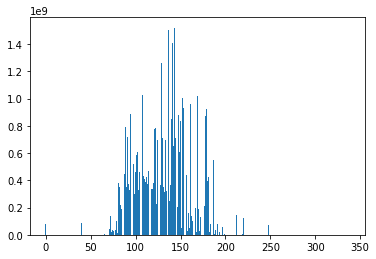

In [721]:
plt.bar(x = df.runtime, height = df.revenue)

### Working on Release_Date

In [722]:
#split datetime function

def splitter(date, seps):
    default_sep = seps[0]
    for sep in seps[1:]:
        date = date.replace(sep, default_sep)
    return [i.strip() for i in date.split(default_sep)]

In [723]:
'''
datetime.datetime(yyyy, mm, dd).weekday()

returns:


0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday
'''

'\ndatetime.datetime(yyyy, mm, dd).weekday()\n\nreturns:\n\n\n0 Monday\n1 Tuesday\n2 Wednesday\n3 Thursday\n4 Friday\n5 Saturday\n6 Sunday\n'

In [724]:
#converting all release_dates to day of the week

#format is [mm, dd, yyyy]

def get_days(df): 
    for d in df.release_date:
        d = splitter(d, ['/','-'])
    
        #correcting year
        if len(d[2])<3:
            if int(d[2])<19:
                d[2] = 2000 + int(d[2])
            else:
                d[2] = 1900 + int(d[2])
    
        #finding weekday
        wd = datetime.datetime(int(d[2]), int(d[0]), int(d[1])).weekday()
    
        weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thurdsay', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
        df['release_day'] = weekdays[wd]
    
    df = df.drop(['release_date'], axis = 1)
    
    return df

### Cleaning "Genres"

In [725]:
def clean_genres(df):
    for i in range(df.shape[0]):
        instance = df.iloc[i].genres
        if type(instance)==float:
            df.at[i+1,'genres'] = ['NA']
        else:
            instance = instance[2:-2]
            l = list(instance.split(','))
        
            #deleting id of every genre
            del l[0::2]
            
            for g in range(len(l)):
                l[g] = l[g][10:]

                if l[g][-1]=='}':
                    l[g] = l[g][:-2]
                else:
                    l[g] = l[g][:-1]

            df.at[i+1,'genres'] = l
    return df

In [726]:
df = clean_genres(df)

### Cleaning Production Companies

In [727]:
def clean_prod_companies(df):
    for i in range(df.shape[0]):
        instance = df.iloc[i].production_companies
        if type(instance)==float:
            df.at[i+1,'production_companies'] = ['NA']
        else:
            instance = instance[1:-1]
            x = re.split(':', instance)
            l = x[1::2]
            for p in range(len(l)):
                l[p] = l[p][2:-7]
            df.at[i+1,'production_companies'] = l
    return df

In [728]:
df = clean_prod_companies(df)

In [729]:
df

,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,
1,Hot Tub Time Machine Collection,14000000,[Comedy],en,Hot Tub Time Machine 2,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,The Princess Diaries Collection,40000000,"[Comedy, Drama, Family, Romance]",en,The Princess Diaries 2: Royal Engagement,8.248895,[Walt Disney Pictures],"[{'iso_3166_1': 'US', 'name': 'United States o...",08-06-2004,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NA,3300000,[Drama],en,Whiplash,64.299990,"[Bold Films, Blumhouse Productions, Right of W...","[{'iso_3166_1': 'US', 'name': 'United States o...",10-10-2014,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NA,1200000,"[Thriller, Drama]",hi,Kahaani,3.174936,[NA],"[{'iso_3166_1': 'IN', 'name': 'India'}]",03-09-2012,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NA,0,"[Action, Thriller]",ko,????,1.148070,[NA],"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",02-05-2009,118.0,"[{'iso_639_1': 'ko', 'name': '???/???'}]",Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
6,NA,8000000,"[Animation, Adventure, Family]",en,Pinocchio and the Emperor of the Night,0.743274,[NA],NaN,08-06-1987,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
7,NA,14000000,"[Horror, Thriller]",en,The Possession,7.286477,"[Ghost House Pictures, North Box Productions]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
8,NA,0,[Documentary],en,Control Room,1.949044,[NA],NaN,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': '???????'}, {'iso...",Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
9,The Muppet Collection,0,"[Action, Comedy, Music, Family, Adventure]",en,Muppet Treasure Island,6.902423,"[Walt Disney Pictures, Jim Henson Productions,...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391


## Creating Seperate Dataframes for Genre/ Prod_Companies/ Countries

In [762]:
def create_newdf(series):
    columns = list()
    for instance in series:
        for i in instance:
            columns.append(i)
#    columns = list(set(columns))
 
    if 'NA' in columns:
        columns.remove('NA')
    A = Counter(columns)
    print(A)

#new_df = pd.DataFrame(index = df.index, columns = columns, dtype = int, data = 0)
#new_df.shape

In [763]:
create_newdf(df.production_companies)

Counter({'Warner Bros.': 202, 'Universal Pictures': 188, 'Paramount Pictures': 161, 'NA': 155, 'Twentieth Century Fox Film Corporation': 138, 'Columbia Pictures': 91, 'Metro-Goldwyn-Mayer (MGM)': 84, 'New Line Cinema': 75, 'Touchstone Pictures': 63, 'Walt Disney Pictures': 62, 'Columbia Pictures Corporation': 61, 'TriStar Pictures': 53, 'Relativity Media': 48, 'Canal+': 46, 'United Artists': 44, 'Miramax Films': 40, 'Village Roadshow Pictures': 36, 'Regency Enterprises': 31, 'BBC Films': 30, 'Dune Entertainment': 30, 'Working Title Films': 30, 'Fox Searchlight Pictures': 29, 'StudioCanal': 28, 'Lionsgate': 28, 'DreamWorks SKG': 27, 'Fox 2000 Pictures': 25, 'Summit Entertainment': 24, 'Hollywood Pictures': 24, 'Orion Pictures': 24, 'Amblin Entertainment': 23, 'Dimension Films': 23, 'Castle Rock Entertainment': 21, 'Epsilon Motion Pictures': 21, 'Morgan Creek Productions': 21, 'Original Film': 21, 'Focus Features': 21, 'Legendary Pictures': 19, 'Participant Media': 19, 'Blumhouse Product